In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data load
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [2]:
5-2-2
#gauss func
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

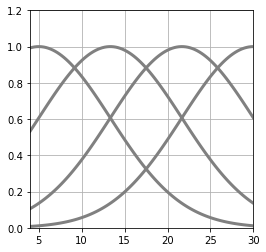

In [5]:
5-2-3
#main
M = 4
plt.figure(figsize=(4,4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)

for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)

plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

In [6]:
5-2-4
#선형 기저 함수 모델
def gauss_func(w, x):
    m = len(w) -1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y+w[m]
    return y

In [7]:
5-2-5
#선형 기저함수 모델 MSE
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse

In [8]:
5-2-6
#선형 기저함수 모델의 해석해
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


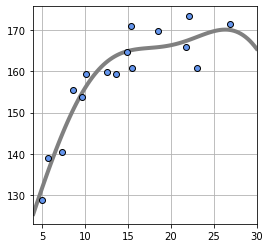

In [9]:
5-2-7
#가우스 기저함수 표시
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5,.5,.5], lw=4)
    
#main
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
        color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+str(np.round(W, 1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

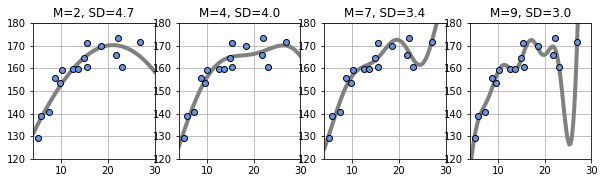

In [11]:
5-2-8

plt.figure(figsize=(10,2.5))
M = [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1, len(M), i+1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
        color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(120, 180)
    mse = mse_gauss_func(X, T, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

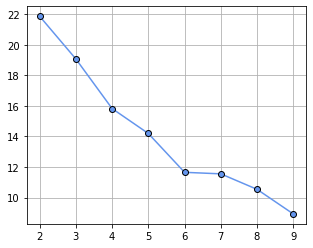

In [12]:
5-2-9
plt.figure(figsize=(5,4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.mean(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
        color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()